In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('student_engagement_data.csv')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Student ID                10000 non-null  int64 
 1   Session ID                10000 non-null  int64 
 2   Date                      10000 non-null  object
 3   EEG Data (PSD Features)   10000 non-null  object
 4   Engagement Level          10000 non-null  object
 5   Attention Level           10000 non-null  object
 6   Internet Connectivity     10000 non-null  object
 7   Adaptivity Level          10000 non-null  object
 8   Learning Mode Prediction  10000 non-null  object
 9   Performance Metrics       10000 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 781.4+ KB
None


In [2]:
print(df.describe())

        Student ID    Session ID  Performance Metrics
count  10000.00000  10000.000000         10000.000000
mean    5000.50000    149.762700            74.674300
std     2886.89568     28.783232            14.383404
min        1.00000    100.000000            50.000000
25%     2500.75000    125.000000            62.000000
50%     5000.50000    150.000000            75.000000
75%     7500.25000    174.000000            87.000000
max    10000.00000    199.000000            99.000000


In [3]:
print(df.isnull().sum())

Student ID                  0
Session ID                  0
Date                        0
EEG Data (PSD Features)     0
Engagement Level            0
Attention Level             0
Internet Connectivity       0
Adaptivity Level            0
Learning Mode Prediction    0
Performance Metrics         0
dtype: int64


In [4]:
categorical_cols = ['Engagement Level', 'Attention Level', 'Internet Connectivity', 'Adaptivity Level', 'Learning Mode Prediction']

for col in categorical_cols:
    print(df[col].value_counts(),"\n")

Engagement Level
Low         3366
Moderate    3357
High        3277
Name: count, dtype: int64 

Attention Level
Moderate    3385
High        3317
Low         3298
Name: count, dtype: int64 

Internet Connectivity
Moderate (Wi-Fi)       3389
High (Mobile/Wi-Fi)    3321
Low (Mobile)           3290
Name: count, dtype: int64 

Adaptivity Level
Moderate    3360
Low         3331
High        3309
Name: count, dtype: int64 

Learning Mode Prediction
Kinesthetic Learner    3374
Auditory Learner       3326
Visual Learner         3300
Name: count, dtype: int64 



In [5]:
df['Date'] = pd.to_datetime(df['Date'])

attention_scores = {'Low': 1, 'Moderate': 2, 'High': 3}
engagement_scores = {'Low': 1, 'Moderate': 2, 'High': 3}

df['Attention_Score'] = df['Attention Level'].map(attention_scores)
df['Engagement_Score'] = df['Engagement Level'].map(engagement_scores)

daily_avg_date = df.groupby('Date').agg({'Attention_Score': 'mean', 'Engagement_Score': 'mean'}).reset_index()

print(daily_avg_date)

         Date  Attention_Score  Engagement_Score
0  2025-01-01         2.013158          2.046053
1  2025-01-02         2.024096          1.978916
2  2025-01-03         1.984177          2.003165
3  2025-01-04         2.078378          1.962162
4  2025-01-05         1.932722          2.006116
5  2025-01-06         1.956647          2.008671
6  2025-01-07         1.993506          1.993506
7  2025-01-08         1.964286          2.074675
8  2025-01-09         1.970149          2.023881
9  2025-01-10         2.047619          1.977778
10 2025-01-11         1.922388          1.958209
11 2025-01-12         2.050794          2.015873
12 2025-01-13         1.940810          1.947040
13 2025-01-14         1.939948          1.966057
14 2025-01-15         1.963277          1.920904
15 2025-01-16         2.000000          2.075988
16 2025-01-17         2.000000          1.976898
17 2025-01-18         1.988338          2.002915
18 2025-01-19         2.027778          1.950617
19 2025-01-20       

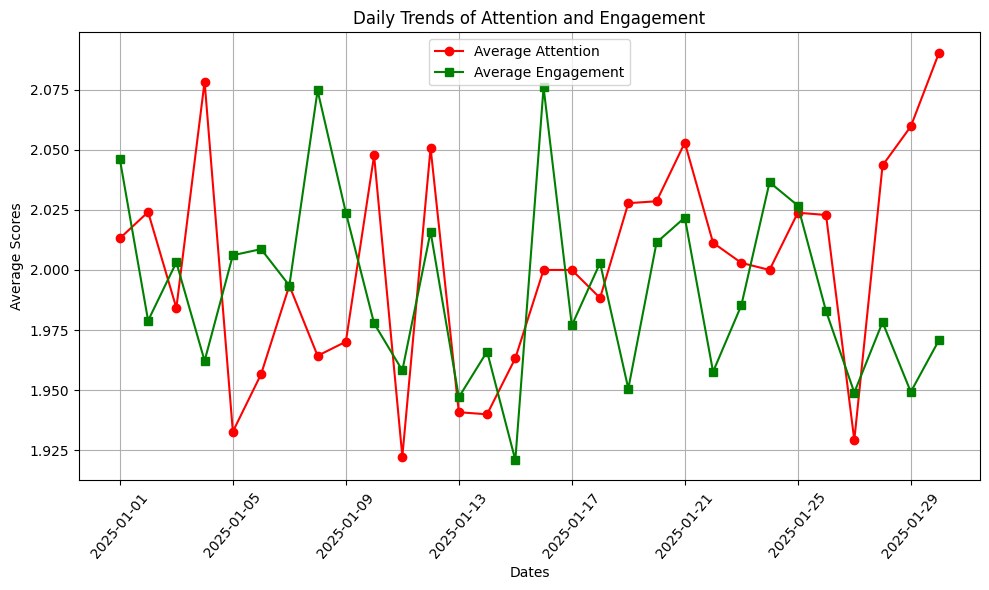

In [6]:
plt.figure(figsize=(10,6))
plt.plot(daily_avg_date['Date'], daily_avg_date['Attention_Score'], marker='o', label='Average Attention', color = 'r')
plt.plot(daily_avg_date['Date'], daily_avg_date['Engagement_Score'], marker='s', label='Average Engagement', color = 'g')

plt.title('Daily Trends of Attention and Engagement')
plt.xlabel('Dates')
plt.ylabel('Average Scores')
plt.xticks(rotation=50)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [7]:
daily_avg_SID = df.groupby('Student ID').agg({'Attention_Score': 'mean', 'Engagement_Score': 'mean'}).reset_index()

print(daily_avg_SID)

      Student ID  Attention_Score  Engagement_Score
0              1              3.0               3.0
1              2              3.0               1.0
2              3              3.0               2.0
3              4              2.0               3.0
4              5              3.0               3.0
...          ...              ...               ...
9995        9996              3.0               3.0
9996        9997              3.0               3.0
9997        9998              1.0               1.0
9998        9999              2.0               2.0
9999       10000              1.0               2.0

[10000 rows x 3 columns]


In [8]:
top_10 = daily_avg_SID.sort_values(by='Attention_Score', ascending=False).head(10)
bottom_10 = daily_avg_SID.sort_values(by='Attention_Score', ascending=False).tail(10)
print(top_10)
print(bottom_10)

      Student ID  Attention_Score  Engagement_Score
9996        9997              3.0               3.0
0              1              3.0               3.0
1              2              3.0               1.0
2              3              3.0               2.0
9995        9996              3.0               3.0
4              5              3.0               3.0
9951        9952              3.0               3.0
9952        9953              3.0               3.0
9955        9956              3.0               2.0
9942        9943              3.0               2.0
      Student ID  Attention_Score  Engagement_Score
9909        9910              1.0               1.0
9937        9938              1.0               2.0
28            29              1.0               2.0
29            30              1.0               2.0
9963        9964              1.0               2.0
56            57              1.0               2.0
57            58              1.0               3.0
58          

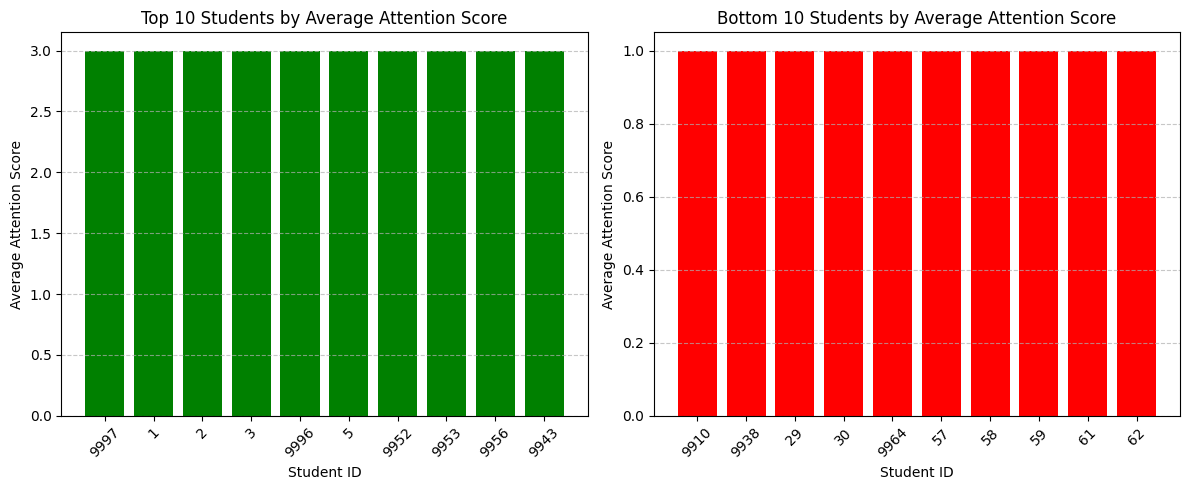

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].bar(top_10['Student ID'].astype(str), top_10['Attention_Score'], color='green')
axes[0].set_title("Top 10 Students by Average Attention Score")
axes[0].set_xlabel("Student ID")
axes[0].set_ylabel("Average Attention Score")
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
axes[0].tick_params(axis='x', rotation=45)

axes[1].bar(bottom_10['Student ID'].astype(str), bottom_10['Attention_Score'], color='red')
axes[1].set_title("Bottom 10 Students by Average Attention Score")
axes[1].set_xlabel("Student ID")
axes[1].set_ylabel("Average Attention Score")
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [10]:
daily_avg_learning_mode = df.groupby('Learning Mode Prediction').agg({'Engagement_Score': 'mean'}).reset_index()

print(daily_avg_learning_mode)

  Learning Mode Prediction  Engagement_Score
0         Auditory Learner          2.015334
1      Kinesthetic Learner          1.977771
2           Visual Learner          1.980303


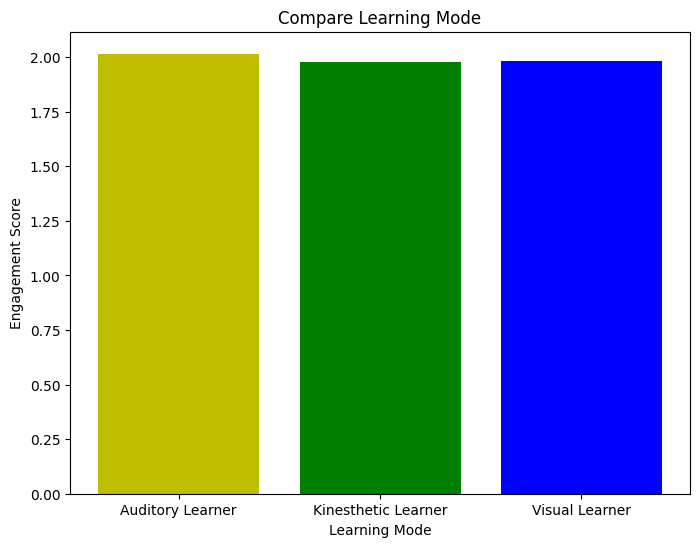

In [11]:
plt.figure(figsize = (8,6))
plt.bar(daily_avg_learning_mode['Learning Mode Prediction'], daily_avg_learning_mode['Engagement_Score'], color = ['y','g','blue'])
plt.title('Compare Learning Mode')
plt.xlabel('Learning Mode')
plt.ylabel('Engagement Score')
plt.show()